In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import shapiro
from statsmodels import robust
from scipy.spatial import distance


players = pd.read_csv("/Users/danielsoriano/Downloads/nfl-big-data-bowl-2025/players.csv")
players

player_play = pd.read_csv("/Users/danielsoriano/Downloads/nfl-big-data-bowl-2025/player_play.csv")
player_play

plays = pd.read_csv("/Users/danielsoriano/Downloads/nfl-big-data-bowl-2025/plays.csv")
plays

plays_df = plays.dropna(subset=['pff_manZone'])

In [2]:
tracking1 = pd.read_csv("/Users/danielsoriano/Downloads/nfl-big-data-bowl-2025/tracking_week_1.csv")
tracking2 = pd.read_csv("/Users/danielsoriano/Downloads/nfl-big-data-bowl-2025/tracking_week_2.csv")
tracking3 = pd.read_csv("/Users/danielsoriano/Downloads/nfl-big-data-bowl-2025/tracking_week_3.csv")
tracking4 = pd.read_csv("/Users/danielsoriano/Downloads/nfl-big-data-bowl-2025/tracking_week_4.csv")
tracking5 = pd.read_csv("/Users/danielsoriano/Downloads/nfl-big-data-bowl-2025/tracking_week_5.csv")
tracking6 = pd.read_csv("/Users/danielsoriano/Downloads/nfl-big-data-bowl-2025/tracking_week_6.csv")
tracking7 = pd.read_csv("/Users/danielsoriano/Downloads/nfl-big-data-bowl-2025/tracking_week_7.csv")
tracking8 = pd.read_csv("/Users/danielsoriano/Downloads/nfl-big-data-bowl-2025/tracking_week_8.csv")
tracking9 = pd.read_csv("/Users/danielsoriano/Downloads/nfl-big-data-bowl-2025/tracking_week_9.csv")

dfs = [] 
file_list = ["/Users/danielsoriano/Downloads/nfl-big-data-bowl-2025/tracking_week_1.csv",
             "/Users/danielsoriano/Downloads/nfl-big-data-bowl-2025/tracking_week_2.csv",
             "/Users/danielsoriano/Downloads/nfl-big-data-bowl-2025/tracking_week_3.csv",
             "/Users/danielsoriano/Downloads/nfl-big-data-bowl-2025/tracking_week_4.csv",
             "/Users/danielsoriano/Downloads/nfl-big-data-bowl-2025/tracking_week_5.csv",
             "/Users/danielsoriano/Downloads/nfl-big-data-bowl-2025/tracking_week_6.csv",
             "/Users/danielsoriano/Downloads/nfl-big-data-bowl-2025/tracking_week_7.csv",
             "/Users/danielsoriano/Downloads/nfl-big-data-bowl-2025/tracking_week_8.csv",
             "/Users/danielsoriano/Downloads/nfl-big-data-bowl-2025/tracking_week_9.csv"]
for file in file_list:
    data = pd.read_csv(file)
    dfs.append(data) 
tracking_df = pd.concat(dfs, ignore_index=True)
tracking_df.columns

Index(['gameId', 'playId', 'nflId', 'displayName', 'frameId', 'frameType',
       'time', 'jerseyNumber', 'club', 'playDirection', 'x', 'y', 's', 'a',
       'dis', 'o', 'dir', 'event'],
      dtype='object')

In [3]:
pass_plays_df = plays_df.dropna(subset=['passResult'])

player_play.columns

Index(['gameId', 'playId', 'nflId', 'teamAbbr', 'hadRushAttempt',
       'rushingYards', 'hadDropback', 'passingYards', 'sackYardsAsOffense',
       'hadPassReception', 'receivingYards', 'wasTargettedReceiver',
       'yardageGainedAfterTheCatch', 'fumbles', 'fumbleLost',
       'fumbleOutOfBounds', 'assistedTackle', 'forcedFumbleAsDefense',
       'halfSackYardsAsDefense', 'passDefensed', 'quarterbackHit',
       'sackYardsAsDefense', 'safetyAsDefense', 'soloTackle', 'tackleAssist',
       'tackleForALoss', 'tackleForALossYardage', 'hadInterception',
       'interceptionYards', 'fumbleRecoveries', 'fumbleRecoveryYards',
       'penaltyYards', 'penaltyNames', 'wasInitialPassRusher',
       'causedPressure', 'timeToPressureAsPassRusher',
       'getOffTimeAsPassRusher', 'inMotionAtBallSnap', 'shiftSinceLineset',
       'motionSinceLineset', 'wasRunningRoute', 'routeRan',
       'blockedPlayerNFLId1', 'blockedPlayerNFLId2', 'blockedPlayerNFLId3',
       'pressureAllowedAsBlocker', 'timeT

In [4]:
pass_plays_df.columns
# player_play[player_play['pressureAllowedAsBlocker'] != np.nan]
player_play = player_play.rename(columns={'nflId': 'nflId_x'})
player_play

gameId  playId  nflId_x teamAbbr  hadRushAttempt  rushingYards  \
0       2022090800      56    35472      BUF               0             0   
1       2022090800      56    42392      BUF               0             0   
2       2022090800      56    42489      BUF               0             0   
3       2022090800      56    44875      BUF               0             0   
4       2022090800      56    44985      BUF               0             0   
...            ...     ...      ...      ...             ...           ...   
354722  2022110700    3787    52666       NO               0             0   
354723  2022110700    3787    52942       NO               0             0   
354724  2022110700    3787    53098       NO               0             0   
354725  2022110700    3787    54476       NO               0             0   
354726  2022110700    3787    55125       NO               0             0   

        hadDropback  passingYards  sackYardsAsOffense  hadPassReception  ...  \
0                 0             0                   0                 0  ...   
1                 0             0                   0                 0  ...   
2                 0             0                   0                 1  ...   
3                 0             0                   0                 0  ...   
4                 0             0                   0                 0  ...   
...             ...           ...                 ...               ...  ...   
354722            0             0                   0                 0  ...   
354723            0             0                   0                 0  ...   
354724            0             0                   0                 0  ...   
354725            0             0                   0                 0  ...   
354726            0             0                   0                 0  ...   

        wasRunningRoute  routeRan  blockedPlayerNFLId1  blockedPlayerNFLId2  \
0                   NaN       NaN              47917.0                  NaN   
1                   NaN       NaN              47917.0                  NaN   
2                   1.0        IN                  NaN                  NaN   
3                   NaN       NaN              43335.0                  NaN   
4                   1.0       OUT                  NaN                  NaN   
...                 ...       ...                  ...                  ...   
354722              NaN       NaN                  NaN                  NaN   
354723              NaN       NaN                  NaN                  NaN   
354724              NaN       NaN                  NaN                  NaN   
354725              NaN       NaN                  NaN                  NaN   
354726              NaN       NaN                  NaN                  NaN   

        blockedPlayerNFLId3  pressureAllowedAsBlocker  \
0                       NaN                       0.0   
1                       NaN                       0.0   
2                       NaN                       NaN   
3                       NaN                       0.0   
4                       NaN                       NaN   
...                     ...                       ...   
354722                  NaN                       NaN   
354723                  NaN                       NaN   
354724                  NaN                       NaN   
354725                  NaN                       NaN   
354726                  NaN                       NaN   

        timeToPressureAllowedAsBlocker  pff_defensiveCoverageAssignment  \
0                                  NaN                              NaN   
1                                  NaN                              NaN   
2                                  NaN                              NaN   
3                                  NaN                              NaN   
4                                  NaN                              NaN   
...                           

In [5]:
# def check_tte_and_position(row):
#   """
#   Checks if the 'pressureAllowedAsBlocker' is not NaN and the 'position' is 'TE'.

#   Args:
#     row: A single row of the DataFrame.

#   Returns:
#     True if both conditions are met, False otherwise.
#   """
#   return not pd.isna(row['wasRunningRoute']) and row['position'] == 'TE'

# # Assuming 'player_plays' is your DataFrame
# # player_play['is_tte_and_te'] = player_play.apply(check_tte_and_position, axis=1)

# # # Convert boolean values to 1/0 (optional)
# # player_play['is_tte_and_te'] = player_play['is_tte_and_te'].astype(int)

In [6]:
pass_plays_df.columns
player_play_subset = player_play[['gameId', 'playId', 'nflId_x', 'wasRunningRoute']]

play_data = tracking_df.merge(players, on='displayName', how='left')
play_data = play_data.drop(columns = ['collegeName', 'birthDate', 'weight', 'height', 'jerseyNumber'])
play_data_no_post_snap = play_data[play_data['frameType'] != 'AFTER_SNAP']

play_data_no_post_snap = play_data_no_post_snap.merge(player_play_subset, on = ['gameId', 'playId', 'nflId_x'], how='left')
play_data_no_post_snap['nflId_x'] = play_data_no_post_snap['nflId_x'].fillna(-1).astype(int)

play_data_no_post_snap 

gameId  playId  nflId_x     displayName  frameId    frameType  \
0         2022091200      64    35459  Kareem Jackson        1  BEFORE_SNAP   
1         2022091200      64    35459  Kareem Jackson        2  BEFORE_SNAP   
2         2022091200      64    35459  Kareem Jackson        3  BEFORE_SNAP   
3         2022091200      64    35459  Kareem Jackson        4  BEFORE_SNAP   
4         2022091200      64    35459  Kareem Jackson        5  BEFORE_SNAP   
...              ...     ...      ...             ...      ...          ...   
39635194  2022110300    3579       -1        football       22  BEFORE_SNAP   
39635195  2022110300    3579       -1        football       23  BEFORE_SNAP   
39635196  2022110300    3579       -1        football       24  BEFORE_SNAP   
39635197  2022110300    3579       -1        football       25  BEFORE_SNAP   
39635198  2022110300    3579       -1        football       26         SNAP   

                           time      club playDirection          x          y  \
0         2022-09-13 00:16:03.5       DEN         right  51.060000  28.550000   
1         2022-09-13 00:16:03.6       DEN         right  51.130000  28.570000   
2         2022-09-13 00:16:03.7       DEN         right  51.200000  28.590000   
3         2022-09-13 00:16:03.8       DEN         right  51.260000  28.620000   
4         2022-09-13 00:16:03.9       DEN         right  51.320000  28.650000   
...                         ...       ...           ...        ...        ...   
39635194    2022-11-04 03:04:34  football          left  74.800003  29.850000   
39635195  2022-11-04 03:04:34.1  football          left  74.800003  29.850000   
39635196  2022-11-04 03:04:34.2  football          left  74.800003  29.850000   
39635197  2022-11-04 03:04:34.3  football          left  74.800003  29.860001   
39635198  2022-11-04 03:04:34.4  football          left  74.800003  29.860001   

             s     a   dis       o    dir                 event  nflId_y  \
0         0.72  0.37  0.07  246.17  68.34  huddle_break_offense  35459.0   
1         0.71  0.36  0.07  245.41  71.21                   NaN  35459.0   
2         0.69  0.23  0.07  244.45  69.90                   NaN  35459.0   
3         0.67  0.22  0.07  244.45  67.98                   NaN  35459.0   
4         0.65  0.34  0.07  245.74  62.83                   NaN  35459.0   
...        ...   ...   ...     ...    ...                   ...      ...   
39635194  0.00  0.00  0.00     NaN    NaN                   NaN      NaN   
39635195  0.00  0.00  0.00     NaN    NaN                   NaN      NaN   
39635196  0.00  0.00  0.00     NaN    NaN                   NaN      NaN   
39635197  0.00  0.00  0.00     NaN    NaN                   NaN      NaN   
39635198  0.00  0.00  0.00     NaN    NaN             ball_snap      NaN   

         position  wasRunningRoute  
0              SS              NaN  
1              SS              NaN  
2              SS              NaN  
3              SS              NaN  
4              SS              NaN  
...           ...              ...  
39635194      NaN              NaN  
39635195      NaN              NaN  
39635196      NaN              NaN  
39635197      NaN              NaN  
39635198      NaN              NaN  

[39635199 rows x 20 columns]

In [7]:
play_data_no_post_snap['wasRunningRoute'] = play_data_no_post_snap['wasRunningRoute'].fillna(0).astype(int)
play_data_no_post_snap['didBlock'] = abs(play_data_no_post_snap['wasRunningRoute'] - 1)

play_data_no_post_snap

gameId  playId  nflId_x     displayName  frameId    frameType  \
0         2022091200      64    35459  Kareem Jackson        1  BEFORE_SNAP   
1         2022091200      64    35459  Kareem Jackson        2  BEFORE_SNAP   
2         2022091200      64    35459  Kareem Jackson        3  BEFORE_SNAP   
3         2022091200      64    35459  Kareem Jackson        4  BEFORE_SNAP   
4         2022091200      64    35459  Kareem Jackson        5  BEFORE_SNAP   
...              ...     ...      ...             ...      ...          ...   
39635194  2022110300    3579       -1        football       22  BEFORE_SNAP   
39635195  2022110300    3579       -1        football       23  BEFORE_SNAP   
39635196  2022110300    3579       -1        football       24  BEFORE_SNAP   
39635197  2022110300    3579       -1        football       25  BEFORE_SNAP   
39635198  2022110300    3579       -1        football       26         SNAP   

                           time      club playDirection          x  ...     s  \
0         2022-09-13 00:16:03.5       DEN         right  51.060000  ...  0.72   
1         2022-09-13 00:16:03.6       DEN         right  51.130000  ...  0.71   
2         2022-09-13 00:16:03.7       DEN         right  51.200000  ...  0.69   
3         2022-09-13 00:16:03.8       DEN         right  51.260000  ...  0.67   
4         2022-09-13 00:16:03.9       DEN         right  51.320000  ...  0.65   
...                         ...       ...           ...        ...  ...   ...   
39635194    2022-11-04 03:04:34  football          left  74.800003  ...  0.00   
39635195  2022-11-04 03:04:34.1  football          left  74.800003  ...  0.00   
39635196  2022-11-04 03:04:34.2  football          left  74.800003  ...  0.00   
39635197  2022-11-04 03:04:34.3  football          left  74.800003  ...  0.00   
39635198  2022-11-04 03:04:34.4  football          left  74.800003  ...  0.00   

             a   dis       o    dir                 event  nflId_y  position  \
0         0.37  0.07  246.17  68.34  huddle_break_offense  35459.0        SS   
1         0.36  0.07  245.41  71.21                   NaN  35459.0        SS   
2         0.23  0.07  244.45  69.90                   NaN  35459.0        SS   
3         0.22  0.07  244.45  67.98                   NaN  35459.0        SS   
4         0.34  0.07  245.74  62.83                   NaN  35459.0        SS   
...        ...   ...     ...    ...                   ...      ...       ...   
39635194  0.00  0.00     NaN    NaN                   NaN      NaN       NaN   
39635195  0.00  0.00     NaN    NaN                   NaN      NaN       NaN   
39635196  0.00  0.00     NaN    NaN                   NaN      NaN       NaN   
39635197  0.00  0.00     NaN    NaN                   NaN      NaN       NaN   
39635198  0.00  0.00     NaN    NaN             ball_snap      NaN       NaN   

         wasRunningRoute  didBlock  
0                      0         1  
1                      0         1  
2                      0         1  
3                      0         1  
4                      0         1  
...                  ...       ...  
39635194               0         1  
39635195               0         1  
39635196               0         1  
39635197               0         1  
39635198               0         1  

[39635199 rows x 21 columns]

In [8]:
play_data_no_post_snap['club'].unique()

array(['DEN', 'SEA', 'football', 'TB', 'DAL', 'TEN', 'NYG', 'MIN', 'GB',
       'LV', 'LAC', 'KC', 'ARI', 'JAX', 'WAS', 'NYJ', 'BAL', 'MIA', 'NE',
       'IND', 'HOU', 'PHI', 'DET', 'CIN', 'PIT', 'SF', 'CHI', 'CLE',
       'CAR', 'NO', 'ATL', 'BUF', 'LA'], dtype=object)

In [21]:
filtered_play_data = play_data_no_post_snap.merge(
    pass_plays_df[['gameId', 'playId']],  
    on=['gameId', 'playId'], 
    how='inner' 
)
teams = filtered_play_data[(filtered_play_data['club'] == 'LV') | 
                             (filtered_play_data['club'] == 'NYG') |
                             (filtered_play_data['club'] == 'HOU')|
                             (filtered_play_data['club'] == 'IND')|
                             (filtered_play_data['club'] == 'LA')|
                             (filtered_play_data['club'] == 'GB')
                             ]
teams

gameId  playId  nflId_x    displayName  frameId    frameType  \
355491    2022091108     104    42471  Jon Feliciano        1  BEFORE_SNAP   
355492    2022091108     104    42471  Jon Feliciano        2  BEFORE_SNAP   
355493    2022091108     104    42471  Jon Feliciano        3  BEFORE_SNAP   
355494    2022091108     104    42471  Jon Feliciano        4  BEFORE_SNAP   
355495    2022091108     104    42471  Jon Feliciano        5  BEFORE_SNAP   
...              ...     ...      ...            ...      ...          ...   
24228060  2022110300    3435    55045    Kurt Hinish       62  BEFORE_SNAP   
24228061  2022110300    3435    55045    Kurt Hinish       63  BEFORE_SNAP   
24228062  2022110300    3435    55045    Kurt Hinish       64  BEFORE_SNAP   
24228063  2022110300    3435    55045    Kurt Hinish       65  BEFORE_SNAP   
24228064  2022110300    3435    55045    Kurt Hinish       66         SNAP   

                           time club playDirection      x  ...     s     a  \
355491      2022-09-11 20:28:18  NYG         right  35.89  ...  0.00  0.00   
355492    2022-09-11 20:28:18.1  NYG         right  35.89  ...  0.00  0.00   
355493    2022-09-11 20:28:18.2  NYG         right  35.89  ...  0.00  0.00   
355494    2022-09-11 20:28:18.3  NYG         right  35.89  ...  0.00  0.00   
355495    2022-09-11 20:28:18.4  NYG         right  35.89  ...  0.00  0.00   
...                         ...  ...           ...    ...  ...   ...   ...   
24228060    2022-11-04 02:59:02  HOU          left  86.59  ...  0.00  0.00   
24228061  2022-11-04 02:59:02.1  HOU          left  86.59  ...  0.00  0.00   
24228062  2022-11-04 02:59:02.2  HOU          left  86.59  ...  0.00  0.00   
24228063  2022-11-04 02:59:02.3  HOU          left  86.60  ...  0.02  0.40   
24228064  2022-11-04 02:59:02.4  HOU          left  86.61  ...  0.11  0.82   

           dis       o     dir                 event  nflId_y  position  \
355491    0.00  326.13    9.96  huddle_break_offense  42471.0         C   
355492    0.00  326.13   10.19                   NaN  42471.0         C   
355493    0.00  326.13   14.65                   NaN  42471.0         C   
355494    0.00  326.13   16.07                   NaN  42471.0         C   
355495    0.00  326.13   19.09                   NaN  42471.0         C   
...        ...     ...     ...                   ...      ...       ...   
24228060  0.00  109.12  132.15                   NaN  55045.0        DT   
24228061  0.00  109.12  130.87                   NaN  55045.0        DT   
24228062  0.00  109.12  127.81                   NaN  55045.0        DT   
24228063  0.00  110.65   99.95                   NaN  55045.0        DT   
24228064  0.01  110.65   96.29             ball_snap  55045.0        DT   

         wasRunningRoute  didBlock  
355491                 0         1  
355492                 0         1  
355493                 0         1  
355494                 0         1  
355495                 0         1  
...                  ...       ...  
24228060               0         1  
24228061               0         1  
24228062               0         1  
24228063               0         1  
24228064               0         1  

[4268449 rows x 21 columns]

In [27]:
import pandas as pd
import numpy as np
from scipy.spatial import distance

def track_football(data):

    grouped = data.groupby(['gameId', 'playId', 'frameId'])

    for _, group in grouped:
        if group.empty:
            continue

        football = group[
            (group['club'] == 'football') & pd.notna(group['x']) & pd.notna(group['y'])
        ]

        football = pd.DataFrame() # Initialize as empty DataFrame
        te_player = group[group['position'] == 'TE']

        if not te_player.empty:
            offensive_club = te_player['club'].iloc[0]
            football = group[
                (group['club'] == 'football') &
                pd.notna(group['x']) & pd.notna(group['y'])
            ]
            
        if football.empty:
            continue
        
        for idx, player in group.iterrows():
            teammates = football[football['nflId_x'] != player['nflId_x']]
            if not teammates.empty:
                distances_to_teammates = distance.cdist(
                    np.array([[player['x'], player['y']]]),
                    teammates[['x', 'y']].values,
                    metric='euclidean'
                )
                closest_teammate_idx = distances_to_teammates.argmin()
                closest_teammate = teammates.iloc[closest_teammate_idx]
                data.at[idx, 'DistanceToFootball'] = distances_to_teammates[0, closest_teammate_idx]

    return data

updated_data = track_football(teams)
updated_data

gameId  playId  nflId_x    displayName  frameId    frameType  \
355491    2022091108     104    42471  Jon Feliciano        1  BEFORE_SNAP   
355492    2022091108     104    42471  Jon Feliciano        2  BEFORE_SNAP   
355493    2022091108     104    42471  Jon Feliciano        3  BEFORE_SNAP   
355494    2022091108     104    42471  Jon Feliciano        4  BEFORE_SNAP   
355495    2022091108     104    42471  Jon Feliciano        5  BEFORE_SNAP   
...              ...     ...      ...            ...      ...          ...   
24228060  2022110300    3435    55045    Kurt Hinish       62  BEFORE_SNAP   
24228061  2022110300    3435    55045    Kurt Hinish       63  BEFORE_SNAP   
24228062  2022110300    3435    55045    Kurt Hinish       64  BEFORE_SNAP   
24228063  2022110300    3435    55045    Kurt Hinish       65  BEFORE_SNAP   
24228064  2022110300    3435    55045    Kurt Hinish       66         SNAP   

                           time club playDirection      x  ...     a   dis  \
355491      2022-09-11 20:28:18  NYG         right  35.89  ...  0.00  0.00   
355492    2022-09-11 20:28:18.1  NYG         right  35.89  ...  0.00  0.00   
355493    2022-09-11 20:28:18.2  NYG         right  35.89  ...  0.00  0.00   
355494    2022-09-11 20:28:18.3  NYG         right  35.89  ...  0.00  0.00   
355495    2022-09-11 20:28:18.4  NYG         right  35.89  ...  0.00  0.00   
...                         ...  ...           ...    ...  ...   ...   ...   
24228060    2022-11-04 02:59:02  HOU          left  86.59  ...  0.00  0.00   
24228061  2022-11-04 02:59:02.1  HOU          left  86.59  ...  0.00  0.00   
24228062  2022-11-04 02:59:02.2  HOU          left  86.59  ...  0.00  0.00   
24228063  2022-11-04 02:59:02.3  HOU          left  86.60  ...  0.40  0.00   
24228064  2022-11-04 02:59:02.4  HOU          left  86.61  ...  0.82  0.01   

               o     dir                 event  nflId_y position  \
355491    326.13    9.96  huddle_break_offense  42471.0        C   
355492    326.13   10.19                   NaN  42471.0        C   
355493    326.13   14.65                   NaN  42471.0        C   
355494    326.13   16.07                   NaN  42471.0        C   
355495    326.13   19.09                   NaN  42471.0        C   
...          ...     ...                   ...      ...      ...   
24228060  109.12  132.15                   NaN  55045.0       DT   
24228061  109.12  130.87                   NaN  55045.0       DT   
24228062  109.12  127.81                   NaN  55045.0       DT   
24228063  110.65   99.95                   NaN  55045.0       DT   
24228064  110.65   96.29             ball_snap  55045.0       DT   

          wasRunningRoute didBlock  distanceToFootball  
355491                  0        1                 NaN  
355492                  0        1                 NaN  
355493                  0        1                 NaN  
355494                  0        1                 NaN  
355495                  0        1                 NaN  
...                   ...      ...                 ...  
24228060                0        1                 NaN  
24228061                0        1                 NaN  
24228062                0        1                 NaN  
24228063                0        1                 NaN  
24228064                0        1                 NaN  

[4268449 rows x 22 columns]

In [25]:
import numpy as np

def calculate_distance_to_football(data):
    """
    Calculate the distance of each player to the football for every frame in the given data.

    Parameters:
    - data (DataFrame): The input DataFrame containing columns ['gameId', 'playId', 'frameId', 'club', 'x', 'y']

    Returns:
    - DataFrame: The input DataFrame with an added column 'distanceToFootball'.
    """
    grouped = data.groupby(['gameId', 'playId', 'frameId'])
    
    data['distanceToFootball'] = np.nan

    for (game_id, play_id, frame_id), group in grouped:
        if group.empty:
            continue

        # Get the football's position for the current frame
        football = group[group['club'] == 'football']
        if football.empty:
            continue

        print(football)

        football_x = football['x'].iloc[0]
        football_y = football['y'].iloc[0]

        # Calculate the distance to the football for each player in the frame
        for idx, player in group.iterrows():
            if player['club'] != 'football' and pd.notna(player['x']) and pd.notna(player['y']):
                distance = np.sqrt((player['x'] - football_x)**2 + (player['y'] - football_y)**2)
                data.at[idx, 'distanceToFootball'] = distance

    return data

updated_data = calculate_distance_to_football(teams)
updated_data

/var/folders/8x/9brmr5z936dchlptv7w2kjzr0000gn/T/ipykernel_52160/4215831913.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['distanceToFootball'] = np.nan


gameId  playId  nflId_x    displayName  frameId    frameType  \
355491    2022091108     104    42471  Jon Feliciano        1  BEFORE_SNAP   
355492    2022091108     104    42471  Jon Feliciano        2  BEFORE_SNAP   
355493    2022091108     104    42471  Jon Feliciano        3  BEFORE_SNAP   
355494    2022091108     104    42471  Jon Feliciano        4  BEFORE_SNAP   
355495    2022091108     104    42471  Jon Feliciano        5  BEFORE_SNAP   
...              ...     ...      ...            ...      ...          ...   
24228060  2022110300    3435    55045    Kurt Hinish       62  BEFORE_SNAP   
24228061  2022110300    3435    55045    Kurt Hinish       63  BEFORE_SNAP   
24228062  2022110300    3435    55045    Kurt Hinish       64  BEFORE_SNAP   
24228063  2022110300    3435    55045    Kurt Hinish       65  BEFORE_SNAP   
24228064  2022110300    3435    55045    Kurt Hinish       66         SNAP   

                           time club playDirection      x  ...     a   dis  \
355491      2022-09-11 20:28:18  NYG         right  35.89  ...  0.00  0.00   
355492    2022-09-11 20:28:18.1  NYG         right  35.89  ...  0.00  0.00   
355493    2022-09-11 20:28:18.2  NYG         right  35.89  ...  0.00  0.00   
355494    2022-09-11 20:28:18.3  NYG         right  35.89  ...  0.00  0.00   
355495    2022-09-11 20:28:18.4  NYG         right  35.89  ...  0.00  0.00   
...                         ...  ...           ...    ...  ...   ...   ...   
24228060    2022-11-04 02:59:02  HOU          left  86.59  ...  0.00  0.00   
24228061  2022-11-04 02:59:02.1  HOU          left  86.59  ...  0.00  0.00   
24228062  2022-11-04 02:59:02.2  HOU          left  86.59  ...  0.00  0.00   
24228063  2022-11-04 02:59:02.3  HOU          left  86.60  ...  0.40  0.00   
24228064  2022-11-04 02:59:02.4  HOU          left  86.61  ...  0.82  0.01   

               o     dir                 event  nflId_y position  \
355491    326.13    9.96  huddle_break_offense  42471.0        C   
355492    326.13   10.19                   NaN  42471.0        C   
355493    326.13   14.65                   NaN  42471.0        C   
355494    326.13   16.07                   NaN  42471.0        C   
355495    326.13   19.09                   NaN  42471.0        C   
...          ...     ...                   ...      ...      ...   
24228060  109.12  132.15                   NaN  55045.0       DT   
24228061  109.12  130.87                   NaN  55045.0       DT   
24228062  109.12  127.81                   NaN  55045.0       DT   
24228063  110.65   99.95                   NaN  55045.0       DT   
24228064  110.65   96.29             ball_snap  55045.0       DT   

          wasRunningRoute didBlock  distanceToFootball  
355491                  0        1                 NaN  
355492                  0        1                 NaN  
355493                  0        1                 NaN  
355494                  0        1                 NaN  
355495                  0        1                 NaN  
...                   ...      ...                 ...  
24228060                0        1                 NaN  
24228061                0        1                 NaN  
24228062                0        1                 NaN  
24228063                0        1                 NaN  
24228064                0        1                 NaN  

[4268449 rows x 22 columns]

In [10]:
import pandas as pd
import numpy as np
from scipy.spatial import distance

def track_closest_defender(data):

    grouped = data.groupby(['gameId', 'playId', 'frameId'])

    for _, group in grouped:
        if group.empty:
            continue

        offensive_players = group[
            (group['club'] != 'football') & pd.notna(group['x']) & pd.notna(group['y'])
        ]

        defensive_players = pd.DataFrame() # Initialize as empty DataFrame
        te_player = group[group['position'] == 'TE']

        if not te_player.empty:
            offensive_club = te_player['club'].iloc[0]
            defensive_players = group[
                (group['club'] != offensive_club) &
                (group['club'] != 'football') &
                pd.notna(group['x']) & pd.notna(group['y'])
            ]
            
        if offensive_players.empty:
            continue
        
        for idx, player in group.iterrows():
            teammates = offensive_players[offensive_players['nflId_x'] != player['nflId_x']]
            if not teammates.empty:
                distances_to_teammates = distance.cdist(
                    np.array([[player['x'], player['y']]]),
                    teammates[['x', 'y']].values,
                    metric='euclidean'
                )
                closest_teammate_idx = distances_to_teammates.argmin()
                closest_teammate = teammates.iloc[closest_teammate_idx]
                data.at[idx, 'closest_defender_distance'] = distances_to_teammates[0, closest_teammate_idx]
                data.at[idx, 'closest_defender_position'] = closest_teammate['position']

    return data

updated_data = track_closest_defender(updated_data)
updated_data

/var/folders/8x/9brmr5z936dchlptv7w2kjzr0000gn/T/ipykernel_52160/3400106593.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.at[idx, 'closest_defender_distance'] = distances_to_teammates[0, closest_teammate_idx]
/var/folders/8x/9brmr5z936dchlptv7w2kjzr0000gn/T/ipykernel_52160/3400106593.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.at[idx, 'closest_defender_position'] = closest_teammate['position']


gameId  playId  nflId_x    displayName  frameId    frameType  \
355491    2022091108     104    42471  Jon Feliciano        1  BEFORE_SNAP   
355492    2022091108     104    42471  Jon Feliciano        2  BEFORE_SNAP   
355493    2022091108     104    42471  Jon Feliciano        3  BEFORE_SNAP   
355494    2022091108     104    42471  Jon Feliciano        4  BEFORE_SNAP   
355495    2022091108     104    42471  Jon Feliciano        5  BEFORE_SNAP   
...              ...     ...      ...            ...      ...          ...   
24228060  2022110300    3435    55045    Kurt Hinish       62  BEFORE_SNAP   
24228061  2022110300    3435    55045    Kurt Hinish       63  BEFORE_SNAP   
24228062  2022110300    3435    55045    Kurt Hinish       64  BEFORE_SNAP   
24228063  2022110300    3435    55045    Kurt Hinish       65  BEFORE_SNAP   
24228064  2022110300    3435    55045    Kurt Hinish       66         SNAP   

                           time club playDirection      x  ...   dis       o  \
355491      2022-09-11 20:28:18  NYG         right  35.89  ...  0.00  326.13   
355492    2022-09-11 20:28:18.1  NYG         right  35.89  ...  0.00  326.13   
355493    2022-09-11 20:28:18.2  NYG         right  35.89  ...  0.00  326.13   
355494    2022-09-11 20:28:18.3  NYG         right  35.89  ...  0.00  326.13   
355495    2022-09-11 20:28:18.4  NYG         right  35.89  ...  0.00  326.13   
...                         ...  ...           ...    ...  ...   ...     ...   
24228060    2022-11-04 02:59:02  HOU          left  86.59  ...  0.00  109.12   
24228061  2022-11-04 02:59:02.1  HOU          left  86.59  ...  0.00  109.12   
24228062  2022-11-04 02:59:02.2  HOU          left  86.59  ...  0.00  109.12   
24228063  2022-11-04 02:59:02.3  HOU          left  86.60  ...  0.00  110.65   
24228064  2022-11-04 02:59:02.4  HOU          left  86.61  ...  0.01  110.65   

             dir                 event  nflId_y  position wasRunningRoute  \
355491      9.96  huddle_break_offense  42471.0         C               0   
355492     10.19                   NaN  42471.0         C               0   
355493     14.65                   NaN  42471.0         C               0   
355494     16.07                   NaN  42471.0         C               0   
355495     19.09                   NaN  42471.0         C               0   
...          ...                   ...      ...       ...             ...   
24228060  132.15                   NaN  55045.0        DT               0   
24228061  130.87                   NaN  55045.0        DT               0   
24228062  127.81                   NaN  55045.0        DT               0   
24228063   99.95                   NaN  55045.0        DT               0   
24228064   96.29             ball_snap  55045.0        DT               0   

          didBlock closest_defender_distance  closest_defender_position  
355491           1                  0.651153                          G  
355492           1                  0.641327                          G  
355493           1                  0.641327                          G  
355494           1                  0.641327                          G  
355495           1                  0.649384                          G  
...            ...                       ...                        ...  
24228060         1                  3.443719                         DT  
24228061         1                  3.443719                         DT  
24228062         1                  3.443719                         DT  
24228063         1                  3.443719                         DT  
24228064         1                  3.444706                         DT  

[4268449 rows x 23 columns]

In [29]:
#updated_data =updated_data.rename(columns={'closest_teammate_distance': 'closest_defender_distance'}, inplace=True)
#updated_data = updated_data.rename(columns={'closest_teammate_position': 'closest_defender_position'}, inplace=True)
updated_data.columns

Index(['gameId', 'playId', 'nflId_x', 'displayName', 'frameId', 'frameType',
       'time', 'club', 'playDirection', 'x', 'y', 's', 'a', 'dis', 'o', 'dir',
       'event', 'nflId_y', 'position', 'wasRunningRoute', 'didBlock',
       'distanceToFootball'],
      dtype='object')

In [32]:
final_processed_data = updated_data[updated_data['position'] == 'TE'] 
final_processed_data

gameId  playId  nflId_x    displayName  frameId    frameType  \
357759    2022091108     104    48475  Chris Myarick        1  BEFORE_SNAP   
357760    2022091108     104    48475  Chris Myarick        2  BEFORE_SNAP   
357761    2022091108     104    48475  Chris Myarick        3  BEFORE_SNAP   
357762    2022091108     104    48475  Chris Myarick        4  BEFORE_SNAP   
357763    2022091108     104    48475  Chris Myarick        5  BEFORE_SNAP   
...              ...     ...      ...            ...      ...          ...   
24225228  2022110300    3369    46167   Jordan Akins      111  BEFORE_SNAP   
24225229  2022110300    3369    46167   Jordan Akins      112  BEFORE_SNAP   
24225230  2022110300    3369    46167   Jordan Akins      113  BEFORE_SNAP   
24225231  2022110300    3369    46167   Jordan Akins      114  BEFORE_SNAP   
24225232  2022110300    3369    46167   Jordan Akins      115         SNAP   

                           time club playDirection      x  ...  \
357759      2022-09-11 20:28:18  NYG         right  34.45  ...   
357760    2022-09-11 20:28:18.1  NYG         right  34.45  ...   
357761    2022-09-11 20:28:18.2  NYG         right  34.45  ...   
357762    2022-09-11 20:28:18.3  NYG         right  34.45  ...   
357763    2022-09-11 20:28:18.4  NYG         right  34.45  ...   
...                         ...  ...           ...    ...  ...   
24225228  2022-11-04 02:56:12.4  HOU         right  87.48  ...   
24225229  2022-11-04 02:56:12.5  HOU         right  87.48  ...   
24225230  2022-11-04 02:56:12.6  HOU         right  87.49  ...   
24225231  2022-11-04 02:56:12.7  HOU         right  87.50  ...   
24225232  2022-11-04 02:56:12.8  HOU         right  87.52  ...   

                         event  nflId_y  position  wasRunningRoute  didBlock  \
357759    huddle_break_offense  48475.0        TE                0         1   
357760                     NaN  48475.0        TE                0         1   
357761                     NaN  48475.0        TE                0         1   
357762                     NaN  48475.0        TE                0         1   
357763                     NaN  48475.0        TE                0         1   
...                        ...      ...       ...              ...       ...   
24225228                   NaN  46167.0        TE                1         0   
24225229                   NaN  46167.0        TE                1         0   
24225230                   NaN  46167.0        TE                1         0   
24225231                   NaN  46167.0        TE                1         0   
24225232             ball_snap  46167.0        TE                1         0   

          distanceToFootball closest_teammate_distance  \
357759                   NaN                       NaN   
357760                   NaN                       NaN   
357761                   NaN                       NaN   
357762                   NaN                       NaN   
357763                   NaN                       NaN   
...                      ...                       ...   
24225228                 NaN                       NaN   
24225229                 NaN                       NaN   
24225230                 NaN                       NaN   
24225231                 NaN                       NaN   
24225232                 NaN                       NaN   

          closest_teammate_position closest_defender_distance  \
357759                          NaN                       NaN   
357760                          NaN                       NaN   
357761                          NaN                       NaN   
357762                          NaN                       NaN   
357763                          NaN                       NaN   
...                             ...                       ...   
24225228                        NaN                       NaN   
24225229                        NaN                       NaN   
24225230                        NaN      

In [31]:
import pandas as pd
import numpy as np
from scipy.spatial import distance

def track_closest_teammate_and_defender(data):
    """
    Calculates the closest teammate and defender for each player within the same playId, gameId, and frameId.
    """
    # Initialize columns for closest teammate and defender
    data['closest_teammate_distance'] = np.nan
    data['closest_teammate_position'] = np.nan
    data['closest_defender_distance'] = np.nan
    data['closest_defender_position'] = np.nan

    # Group by gameId, playId, and frameId
    grouped = data.groupby(['gameId', 'playId', 'frameId'])

    for _, group in grouped:
        # Skip empty groups
        if group.empty:
            continue

        # Split into offensive and defensive players
        offensive_players = group[
            (group['club'] != 'football') & pd.notna(group['x']) & pd.notna(group['y'])
        ]
        if offensive_players.empty:
            continue

        defensive_players = group[
            (group['club'] != offensive_players['club'].iloc[0]) & (group['club'] != 'football') &
            pd.notna(group['x']) & pd.notna(group['y'])
        ]

        for idx, player in group.iterrows():
            # Compute closest teammate
            teammates = offensive_players[offensive_players['nflId_x'] != player['nflId_x']]
            if not teammates.empty:
                distances_to_teammates = distance.cdist(
                    np.array([[player['x'], player['y']]]),
                    teammates[['x', 'y']].values,
                    metric='euclidean'
                )
                closest_teammate_idx = distances_to_teammates.argmin()
                closest_teammate = teammates.iloc[closest_teammate_idx]
                data.at[idx, 'closest_teammate_distance'] = distances_to_teammates[0, closest_teammate_idx]
                data.at[idx, 'closest_teammate_position'] = closest_teammate['position']

            # Compute closest defender
            if not defensive_players.empty:
                distances_to_defenders = distance.cdist(
                    np.array([[player['x'], player['y']]]),
                    defensive_players[['x', 'y']].values,
                    metric='euclidean'
                )
                closest_defender_idx = distances_to_defenders.argmin()
                closest_defender = defensive_players.iloc[closest_defender_idx]
                data.at[idx, 'closest_defender_distance'] = distances_to_defenders[0, closest_defender_idx]
                data.at[idx, 'closest_defender_position'] = closest_defender['position']

    return data


updated_data = track_closest_teammate_and_defender(teams)
updated_data


/var/folders/8x/9brmr5z936dchlptv7w2kjzr0000gn/T/ipykernel_52160/3588207510.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['closest_teammate_distance'] = np.nan
/var/folders/8x/9brmr5z936dchlptv7w2kjzr0000gn/T/ipykernel_52160/3588207510.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['closest_teammate_position'] = np.nan
/var/folders/8x/9brmr5z936dchlptv7w2kjzr0000gn/T/ipykernel_52160/3588207510.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

KeyboardInterrupt: 

In [ ]:
# teams_te = updated_data[updated_data['position'] == 'TE']
# track_closest_teammate_and_defender(teams)
# teams_te
updated_data[updated_data['position'] == 'TE']

In [33]:
import pandas as pd
import numpy as np

def find_nearest_players(df):
    # Define a helper function to calculate Euclidean distance
    def euclidean_distance(x1, y1, x2, y2):
        return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

    # Create empty lists to store the nearest teammate and defender distances
    nearest_teammates = []
    nearest_defenders = []

    # Group the DataFrame by unique playId and gameId combinations
    grouped = df.groupby(['gameId', 'playId'])

    for (gameId, playId), group in grouped:
        group = group.reset_index()  # Reset index for easy access

        # Iterate through each player in the group
        for idx, player in group.iterrows():
            player_x, player_y, player_club, player_position = player['x'], player['y'], player['club'], player['position']

            # Check if the player's position is 'TE'
            if player_position == 'TE':
                # Find teammates with the same club value
                teammates = group[(group['club'] == player_club) & (group.index != idx)]

                # Find defenders with the position 'DT'
                defenders = group[(group['position'] == 'DT') & (group.index != idx)]

                # Calculate distances to all teammates
                if not teammates.empty:
                    teammates['distance'] = teammates.apply(
                        lambda row: euclidean_distance(player_x, player_y, row['x'], row['y']), axis=1
                    )
                    nearest_teammate = teammates['distance'].min()
                else:
                    nearest_teammate = 0

                # Calculate distances to all defenders
                if not defenders.empty:
                    defenders['distance'] = defenders.apply(
                        lambda row: euclidean_distance(player_x, player_y, row['x'], row['y']), axis=1
                    )
                    nearest_defender = defenders['distance'].min()
                else:
                    nearest_defender = 0
            else:
                # If not 'TE', set distances to 0
                nearest_teammate = 0
                nearest_defender = 0

            nearest_teammates.append(nearest_teammate)
            nearest_defenders.append(nearest_defender)

    # Add the new columns to the original DataFrame
    df['nearestTeammate'] = nearest_teammates
    df['nearestDefender'] = nearest_defenders

    return df

result_df = find_nearest_players(teams)
result_df




/var/folders/8x/9brmr5z936dchlptv7w2kjzr0000gn/T/ipykernel_52160/724546706.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teammates['distance'] = teammates.apply(
/var/folders/8x/9brmr5z936dchlptv7w2kjzr0000gn/T/ipykernel_52160/724546706.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teammates['distance'] = teammates.apply(
/var/folders/8x/9brmr5z936dchlptv7w2kjzr0000gn/T/ipykernel_52160/724546706.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


KeyboardInterrupt: 

In [ ]:
from scipy.spatial import distance
import numpy as np
import pandas as pd

def track_closest_teammate(play_data):
    """
    Finds the closest teammate's distance and position for each offensive player in the play data,
    ensuring the teammate is not 'football' and belongs to the same team.

    Parameters:
        play_data (pd.DataFrame): Data for all players in a specific frame.

    Returns:
        pd.DataFrame: Updated play_data with columns for closest teammate's distance and position.
    """
    # Initialize new columns for closest teammate distance and position
    play_data['closest_teammate_distance'] = np.nan
    play_data['closest_teammate_position'] = np.nan

    # Identify the offensive team (team of the 'QB', or the first offensive player found)
    offensive_players = play_data[
        (play_data['club'] != 'football') & 
        pd.notna(play_data['x']) & 
        pd.notna(play_data['y'])
    ]
    
    if offensive_players.empty:
        print("No offensive players found in play data.")
        return play_data

    offensive_team = offensive_players['club'].iloc[0]  # Assume the first player's team is the offensive team

    # Filter valid offensive teammates (same team as offensive team, excluding 'football')
    valid_teammates = play_data[
        (play_data['club'] == offensive_team) &
        (play_data['displayName'] != 'football')
    ]

    # Skip if there are no valid teammates
    if valid_teammates.empty:
        print("No valid offensive teammates found.")
        return play_data

    # Loop through each offensive player in the play data
    for player_index, player_row in play_data.iterrows():
        # Skip players not on the offensive team
        if player_row['club'] != offensive_team:
            continue

        # Calculate distances to all valid teammates (excluding the player themselves)
        teammates = valid_teammates[valid_teammates['displayName'] != player_row['displayName']]
        if teammates.empty:
            continue

        teammate_distances = teammates.apply(
            lambda teammate: distance.euclidean(
                (player_row['x'], player_row['y']),
                (teammate['x'], teammate['y'])
            ),
            axis=1
        )

        # Find the index of the closest teammate
        closest_teammate_index = teammate_distances.idxmin()
        closest_teammate_distance = teammate_distances[closest_teammate_index]

        # Get the closest teammate's position
        closest_teammate_position = teammates.loc[closest_teammate_index, 'position']

        # Update the play_data DataFrame
        play_data.at[player_index, 'closest_teammate_distance'] = closest_teammate_distance
        play_data.at[player_index, 'closest_teammate_position'] = closest_teammate_position

    return play_data



def track_closest_defender(play_data):
    """
    Finds the closest defender's distance and position for each player in the play data, 
    ensuring the defender's team is the same as the 'DT' and the defender is not 'football'.

    Parameters:
        play_data (pd.DataFrame): Data for all players in a specific frame.

    Returns:
        pd.DataFrame: Updated play_data with columns for closest defender's distance and position.
    """
    # Initialize new columns for closest defender distance and position
    play_data['closest_defender_distance'] = np.nan
    play_data['closest_defender_position'] = np.nan

    # Identify the defensive team (team of the 'DT')
    dt_player = play_data[play_data['position'] == 'DT']
    if dt_player.empty:
        print("No 'DT' player found in play data.")
        return play_data

    defensive_team = dt_player['club'].iloc[0]  # Assume only one DT; take their team

    # Filter valid defensive players (same team as the DT, excluding 'football')
    valid_defenders = play_data[
        (play_data['club'] == defensive_team) &
        (play_data['displayName'] != 'football')
    ]

    # Skip if there are no valid defenders
    if valid_defenders.empty:
        print("No valid defenders from the same team as 'DT'.")
        return play_data

    # Loop through each player in the play data
    for player_index, player_row in play_data.iterrows():
        # Skip players already on the defensive team
        if player_row['club'] == defensive_team:
            continue

        # Calculate distances to all valid defenders
        defender_distances = valid_defenders.apply(
            lambda defender: distance.euclidean(
                (player_row['x'], player_row['y']),
                (defender['x'], defender['y'])
            ),
            axis=1
        )

        # Find the index of the closest defender
        closest_defender_index = defender_distances.idxmin()
        closest_defender_distance = defender_distances[closest_defender_index]

        # Get the closest defender's position
        closest_defender_position = valid_defenders.loc[closest_defender_index, 'position']

        # Update the play_data DataFrame
        play_data.at[player_index, 'closest_defender_distance'] = closest_defender_distance
        play_data.at[player_index, 'closest_defender_position'] = closest_defender_position

    return play_data

def track_distances(play_data):
    """
    Main function that calculates distances to the closest teammate and defender
    for all unique gameId and playId combinations.

    Parameters:
        play_data (pd.DataFrame): Data for all plays and frames.

    Returns:
        pd.DataFrame: Updated DataFrame with calculated distances and positions.
    """
    # Initialize columns for closest teammate and defender distances/positions
    play_data['closest_teammate_distance'] = np.nan
    play_data['closest_teammate_position'] = np.nan
    play_data['closest_defender_distance'] = np.nan
    play_data['closest_defender_position'] = np.nan

    # Iterate over unique combinations of gameId and playId
    unique_combos = play_data[['gameId', 'playId']].drop_duplicates()
    
    for _, combo in unique_combos.iterrows():
        game_id = combo['gameId']
        play_id = combo['playId']

        # Filter the data for the specific gameId and playId
        frame_data = play_data[(play_data['gameId'] == game_id) & (play_data['playId'] == play_id)].copy()

        if frame_data.empty:
            continue

        # Identify offensive players
        offensive_players = frame_data[
            (frame_data['club'] != 'football') & pd.notna(frame_data['x']) & pd.notna(frame_data['y'])
        ]

        if offensive_players.empty:
            continue

        # Identify the offensive team
        offensive_team = offensive_players['club'].iloc[0]

        # Identify defensive players
        defensive_players = frame_data[
            (frame_data['club'] != offensive_team) & (frame_data['club'] != 'football') & 
            pd.notna(frame_data['x']) & pd.notna(frame_data['y'])
        ]

        if defensive_players.empty:
            continue

        # Calculate distances to the closest teammate
        for idx, player in frame_data.iterrows():
            if player['club'] == offensive_team and player['displayName'] != 'football':
                # Find closest teammate
                teammates = offensive_players[offensive_players['displayName'] != player['displayName']]
                if not teammates.empty:
                    teammate_distances = teammates.apply(
                        lambda teammate: distance.euclidean((player['x'], player['y']), (teammate['x'], teammate['y'])),
                        axis=1
                    )
                    closest_teammate_idx = teammate_distances.idxmin()
                    closest_teammate_distance = teammate_distances[closest_teammate_idx]
                    closest_teammate_position = teammates.loc[closest_teammate_idx, 'position']
                    play_data.at[idx, 'closest_teammate_distance'] = closest_teammate_distance
                    play_data.at[idx, 'closest_teammate_position'] = closest_teammate_position

            # Find closest defender
            defenders = defensive_players[defensive_players['displayName'] != 'football']
            if not defenders.empty:
                defender_distances = defenders.apply(
                    lambda defender: distance.euclidean((player['x'], player['y']), (defender['x'], defender['y'])),
                    axis=1
                )
                closest_defender_idx = defender_distances.idxmin()
                closest_defender_distance = defender_distances[closest_defender_idx]
                closest_defender_position = defenders.loc[closest_defender_idx, 'position']
                play_data.at[idx, 'closest_defender_distance'] = closest_defender_distance
                play_data.at[idx, 'closest_defender_position'] = closest_defender_position

    return play_data


In [ ]:
## Testing track_nearest_te_and_defender
processed_play_data = track_distances(filtered_play_data, game_id=2022110609, play_id=339)
processed_play_data = processed_play_data[processed_play_data['position'] == 'TE']
processed_play_data

In [34]:
def determine_orientation(row):
    """
    Determines the player's orientation label based on 'o', 'playDirection', and 'y'.

    Parameters:
    - row (Series): A row of the DataFrame with columns 'o', 'playDirection', and 'y'.

    Returns:
    - str: The orientation label ('Backwards', 'Steep Inside', 'Inside', 'Forward', 'Outside', 'Steep Outside').
    """
    y_threshold = 26.65
    o = row['o']
    play_direction = row['playDirection']
    y = row['y']

    # Play direction: left
    if play_direction == 'left':
        if 0 <= o < 180:
            return 'Backwards'

        if y < y_threshold:
            if 360 >= o > 324:
                return 'Steep Inside'
            elif 324 >= o > 288:
                return 'Inside'
            elif 288 >= o > 252:
                return 'Forward'
            elif 252 >= o > 216:
                return 'Outside'
            elif 216 >= o > 180:
                return 'Steep Outside'
        
        else:
            if 360 >= o > 324:
                return 'Steep Outside'
            elif 324 >= o > 288:
                return 'Outside'
            elif 288 >= o > 252:
                return 'Forward'
            elif 252 >= o > 216:
                return 'Inside'
            elif 216 >= o > 180:
                return 'Steep Inside'

    # Play direction: right
    elif play_direction == 'right':
        if 180 < o <= 360:
            return 'Backwards'

        if y < y_threshold:
            if 0 <= o < 36:
                return 'Steep Inside'
            elif 36 <= o < 72:
                return 'Inside'
            elif 72 <= o < 108:
                return 'Forward'
            elif 108 <= o < 144:
                return 'Outside'
            elif 144 <= o < 180:
                return 'Steep Outside'
        
        else:
            if 0 <= o < 36:
                return 'Steep Outside'
            elif 36 <= o < 72:
                return 'Outside'
            elif 72 <= o < 108:
                return 'Forward'
            elif 108 <= o < 144:
                return 'Inside'
            elif 144 <= o < 180:
                return 'Steep Inside'

    return None  

final_processed_data['orientation'] = final_processed_data.apply(determine_orientation, axis=1)
final_processed_data

/var/folders/8x/9brmr5z936dchlptv7w2kjzr0000gn/T/ipykernel_52160/1214021205.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_processed_data['orientation'] = final_processed_data.apply(determine_orientation, axis=1)


gameId  playId  nflId_x    displayName  frameId    frameType  \
357759    2022091108     104    48475  Chris Myarick        1  BEFORE_SNAP   
357760    2022091108     104    48475  Chris Myarick        2  BEFORE_SNAP   
357761    2022091108     104    48475  Chris Myarick        3  BEFORE_SNAP   
357762    2022091108     104    48475  Chris Myarick        4  BEFORE_SNAP   
357763    2022091108     104    48475  Chris Myarick        5  BEFORE_SNAP   
...              ...     ...      ...            ...      ...          ...   
24225228  2022110300    3369    46167   Jordan Akins      111  BEFORE_SNAP   
24225229  2022110300    3369    46167   Jordan Akins      112  BEFORE_SNAP   
24225230  2022110300    3369    46167   Jordan Akins      113  BEFORE_SNAP   
24225231  2022110300    3369    46167   Jordan Akins      114  BEFORE_SNAP   
24225232  2022110300    3369    46167   Jordan Akins      115         SNAP   

                           time club playDirection      x  ...  nflId_y  \
357759      2022-09-11 20:28:18  NYG         right  34.45  ...  48475.0   
357760    2022-09-11 20:28:18.1  NYG         right  34.45  ...  48475.0   
357761    2022-09-11 20:28:18.2  NYG         right  34.45  ...  48475.0   
357762    2022-09-11 20:28:18.3  NYG         right  34.45  ...  48475.0   
357763    2022-09-11 20:28:18.4  NYG         right  34.45  ...  48475.0   
...                         ...  ...           ...    ...  ...      ...   
24225228  2022-11-04 02:56:12.4  HOU         right  87.48  ...  46167.0   
24225229  2022-11-04 02:56:12.5  HOU         right  87.48  ...  46167.0   
24225230  2022-11-04 02:56:12.6  HOU         right  87.49  ...  46167.0   
24225231  2022-11-04 02:56:12.7  HOU         right  87.50  ...  46167.0   
24225232  2022-11-04 02:56:12.8  HOU         right  87.52  ...  46167.0   

          position  wasRunningRoute  didBlock  distanceToFootball  \
357759          TE                0         1                 NaN   
357760          TE                0         1                 NaN   
357761          TE                0         1                 NaN   
357762          TE                0         1                 NaN   
357763          TE                0         1                 NaN   
...            ...              ...       ...                 ...   
24225228        TE                1         0                 NaN   
24225229        TE                1         0                 NaN   
24225230        TE                1         0                 NaN   
24225231        TE                1         0                 NaN   
24225232        TE                1         0                 NaN   

          closest_teammate_distance closest_teammate_position  \
357759                          NaN                       NaN   
357760                          NaN                       NaN   
357761                          NaN                       NaN   
357762                          NaN                       NaN   
357763                          NaN                       NaN   
...                             ...                       ...   
24225228                        NaN                       NaN   
24225229                        NaN                       NaN   
24225230                        NaN                       NaN   
24225231                        NaN                       NaN   
24225232                        NaN                       NaN   

          closest_defender_distance closest_defender_position  orientation  
357759                          NaN                       NaN      Forward  
357760                          NaN                       NaN      Forward  
357761                          NaN                       NaN      Forward  
357762                          NaN                       NaN      Forward  
357763                          NaN                       NaN      Forward  
...                             ...                       ...          ...  
24225228                   

In [ ]:
# import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)

# teams[['closest_teammate_distance', 'closest_teammate_position', 
#                     'closest_defender_distance', 'closest_defender_position']] = np.nan

# # filtered_play_data
# teams

# teams_te[['closest_teammate_distance', 'closest_teammate_position', 
#                     'closest_defender_distance', 'closest_defender_position']] = np.nan

# # filtered_play_data
# teams_te

In [ ]:
def track_distances(frame_data):
    """
    Processes distances for all unique combinations of gameId and playId within the DataFrame.
    """
    results = []

    # Loop through all unique combinations of gameId and playId
    for game_id in frame_data['gameId'].unique():
        for play_id in frame_data[frame_data['gameId'] == game_id]['playId'].unique():
            # Filter the data for the current gameId and playId
            play_data = frame_data[(frame_data['gameId'] == game_id) & (frame_data['playId'] == play_id)].copy()

            if play_data.empty:
                continue  # Skip if no data for this combination

            # Perform your processing logic here (e.g., calculate distances)
            play_data = track_closest_teammate(play_data)
            play_data = track_closest_defender(play_data)

            # Append the processed play_data to the results
            results.append(play_data)

    # Combine all processed plays into a single DataFrame
    final_data = pd.concat(results, ignore_index=True)
    return final_data

final_processed_data = track_distances(updated_data)
final_processed_data

In [35]:
final_processed_data.columns

# final_processed_data['is_tte_and_te'] = final_processed_data.apply(check_tte_and_position, axis=1)
# final_processed_data['wasRunningRoute'] = final_processed_data['wasRunningRoute'].fillna(0)
# final_processed_data['blocked'] = (
#     (final_processed_data['wasRunningRoute'] == 1)
# ).astype(int)

Index(['gameId', 'playId', 'nflId_x', 'displayName', 'frameId', 'frameType',
       'time', 'club', 'playDirection', 'x', 'y', 's', 'a', 'dis', 'o', 'dir',
       'event', 'nflId_y', 'position', 'wasRunningRoute', 'didBlock',
       'distanceToFootball', 'closest_teammate_distance',
       'closest_teammate_position', 'closest_defender_distance',
       'closest_defender_position', 'orientation'],
      dtype='object')

In [71]:
# final_processed_data['playDirection'].replace(['left', 'right'],[0, 1], inplace=True)
# final_processed_data

In [36]:
from sklearn.preprocessing import LabelEncoder

final_processed_data['position_encoded'] = LabelEncoder().fit_transform(final_processed_data['position'])
# final_processed_data['closest_teammate_position_encoded'] = LabelEncoder().fit_transform(final_processed_data['closest_teammate_position'])
final_processed_data['orientation_encoded'] = LabelEncoder().fit_transform(final_processed_data['orientation'])
final_processed_data['closest_defender_position_encoded'] = LabelEncoder().fit_transform(final_processed_data['closest_defender_position'])

/var/folders/8x/9brmr5z936dchlptv7w2kjzr0000gn/T/ipykernel_52160/1834912888.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_processed_data['position_encoded'] = LabelEncoder().fit_transform(final_processed_data['position'])
/var/folders/8x/9brmr5z936dchlptv7w2kjzr0000gn/T/ipykernel_52160/1834912888.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_processed_data['orientation_encoded'] = LabelEncoder().fit_transform(final_processed_data['orientation'])
/var/folders/8x/9brmr5z936dchlptv7w2kj

In [73]:
# final_processed_data['closest_teammate_distance'] = final_processed_data['closest_teammate_distance'].fillna(-1)
# final_processed_data['closest_teammate_position_encoded'] = final_processed_data['closest_teammate_position_encoded'].fillna(-1)
# final_processed_data['closest_defender_position_encoded'] = final_processed_data['closest_defender_position_encoded'].fillna(-1)
# final_processed_data['closest_defender_distance'] = final_processed_data['closest_defender_distance'].fillna(-1)
# final_processed_data.isnull().any()

In [37]:
# train = final_processed_data[final_processed_data['gameId']%2 == 0]
# test = final_processed_data[final_processed_data['gameId']%2 == 1]

# Step 1: Identify unique gameIds and sort them
unique_game_ids = final_processed_data['gameId'].unique()
unique_game_ids.sort()

# Step 2: Determine the split point for 75% training and 25% testing
split_index = int(len(unique_game_ids) * 0.75)

# Step 3: Split the gameIds into training and testing sets
train_game_ids = unique_game_ids[:split_index]
test_game_ids = unique_game_ids[split_index:]

# Step 4: Create training and testing datasets based on gameIds
train = final_processed_data[final_processed_data['gameId'].isin(train_game_ids)]
test = final_processed_data[final_processed_data['gameId'].isin(test_game_ids)]

# Display the results
print(f"Number of training games: {len(train_game_ids)}")
print(f"Number of testing games: {len(test_game_ids)}")
print(f"Training set size: {len(train)}")
print(f"Testing set size: {len(test)}")

test

Number of training games: 35
Number of testing games: 12
Training set size: 184635
Testing set size: 60133


gameId  playId  nflId_x    displayName  frameId    frameType  \
17648248  2022102308     115    47920  Foster Moreau        1  BEFORE_SNAP   
17648249  2022102308     115    47920  Foster Moreau        2  BEFORE_SNAP   
17648250  2022102308     115    47920  Foster Moreau        3  BEFORE_SNAP   
17648251  2022102308     115    47920  Foster Moreau        4  BEFORE_SNAP   
17648252  2022102308     115    47920  Foster Moreau        5  BEFORE_SNAP   
...              ...     ...      ...            ...      ...          ...   
24225228  2022110300    3369    46167   Jordan Akins      111  BEFORE_SNAP   
24225229  2022110300    3369    46167   Jordan Akins      112  BEFORE_SNAP   
24225230  2022110300    3369    46167   Jordan Akins      113  BEFORE_SNAP   
24225231  2022110300    3369    46167   Jordan Akins      114  BEFORE_SNAP   
24225232  2022110300    3369    46167   Jordan Akins      115         SNAP   

                           time club playDirection      x  ...  didBlock  \
17648248  2022-10-23 20:07:53.5   LV          left  86.92  ...         0   
17648249  2022-10-23 20:07:53.6   LV          left  86.87  ...         0   
17648250  2022-10-23 20:07:53.7   LV          left  86.80  ...         0   
17648251  2022-10-23 20:07:53.8   LV          left  86.73  ...         0   
17648252  2022-10-23 20:07:53.9   LV          left  86.62  ...         0   
...                         ...  ...           ...    ...  ...       ...   
24225228  2022-11-04 02:56:12.4  HOU         right  87.48  ...         0   
24225229  2022-11-04 02:56:12.5  HOU         right  87.48  ...         0   
24225230  2022-11-04 02:56:12.6  HOU         right  87.49  ...         0   
24225231  2022-11-04 02:56:12.7  HOU         right  87.50  ...         0   
24225232  2022-11-04 02:56:12.8  HOU         right  87.52  ...         0   

          distanceToFootball  closest_teammate_distance  \
17648248                 NaN                        NaN   
17648249                 NaN                        NaN   
17648250                 NaN                        NaN   
17648251                 NaN                        NaN   
17648252                 NaN                        NaN   
...                      ...                        ...   
24225228                 NaN                        NaN   
24225229                 NaN                        NaN   
24225230                 NaN                        NaN   
24225231                 NaN                        NaN   
24225232                 NaN                        NaN   

          closest_teammate_position  closest_defender_distance  \
17648248                        NaN                        NaN   
17648249                        NaN                        NaN   
17648250                        NaN                        NaN   
17648251                        NaN                        NaN   
17648252                        NaN                        NaN   
...                             ...                        ...   
24225228                        NaN                        NaN   
24225229                        NaN                        NaN   
24225230                        NaN                        NaN   
24225231                        NaN                        NaN   
24225232                        NaN                        NaN   

          closest_defender_position orientation  position_encoded  \
17648248                        NaN      Inside                 0   
17648249                        NaN      Inside                 0   
17648250                        NaN      Inside                 0   
17648251                        NaN     Forward                 0   
17648252                        NaN     Forward                 0   
...                             ...         ...               ...   
24225228                        NaN      Inside                 0   
24225229                        NaN      Inside                 0   
24225230                        NaN      

In [38]:
test.columns

Index(['gameId', 'playId', 'nflId_x', 'displayName', 'frameId', 'frameType',
       'time', 'club', 'playDirection', 'x', 'y', 's', 'a', 'dis', 'o', 'dir',
       'event', 'nflId_y', 'position', 'wasRunningRoute', 'didBlock',
       'distanceToFootball', 'closest_teammate_distance',
       'closest_teammate_position', 'closest_defender_distance',
       'closest_defender_position', 'orientation', 'position_encoded',
       'orientation_encoded', 'closest_defender_position_encoded'],
      dtype='object')

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# find TE nearest ____ # what kind of motion, 
# mix the play data with the tracking data to use as a data set
# allow the plays to be all passing plays and then use those games and we can isolate the data
# of just the motion plays for further analysis

X = final_processed_data[[ 's','a', 'dis', 'club',  'orientation_encoded', 'closest_defender_distance', 'closest_defender_position_encoded']]
y = final_processed_data['didBlock']  

X_train = train[['s','a', 'dis', 'club',  'orientation_encoded', 'closest_defender_distance', 'closest_defender_position_encoded']]
X_test = test[['s','a', 'dis', 'club',  'orientation_encoded', 'closest_defender_distance', 'closest_defender_position_encoded']]
y_train = train['didBlock']
y_test = test['didBlock']

In [40]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout

# Reshape the data for RNN (1 time step for each instance in this case)
X_train_rnn = np.expand_dims(X_train.values, axis=1)  # Shape: (samples, time steps, features)
X_test_rnn = np.expand_dims(X_test.values, axis=1)    # Shape: (samples, time steps, features)

# Define the RNN model
model = Sequential()

# Add an RNN layer (can also use LSTM or GRU layers depending on complexity)
model.add(SimpleRNN(64, activation='relu', input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2]), return_sequences=False))

# Dropout for regularization
model.add(Dropout(0.2))

# Add a Dense layer for classification
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_rnn, y_train, epochs=10, batch_size=32, validation_data=(X_test_rnn, y_test))

# Evaluate the model
y_pred = model.predict(X_test_rnn)
test['prediction'] = y_pred

y_pred = (y_pred > 0.5)  # Binarize predictions (for classification)

# Print evaluation metrics
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


ValueError: Invalid dtype: object

In [41]:
test.to_csv('out1.csv', index=False)  

test

gameId  playId  nflId_x    displayName  frameId    frameType  \
17648248  2022102308     115    47920  Foster Moreau        1  BEFORE_SNAP   
17648249  2022102308     115    47920  Foster Moreau        2  BEFORE_SNAP   
17648250  2022102308     115    47920  Foster Moreau        3  BEFORE_SNAP   
17648251  2022102308     115    47920  Foster Moreau        4  BEFORE_SNAP   
17648252  2022102308     115    47920  Foster Moreau        5  BEFORE_SNAP   
...              ...     ...      ...            ...      ...          ...   
24225228  2022110300    3369    46167   Jordan Akins      111  BEFORE_SNAP   
24225229  2022110300    3369    46167   Jordan Akins      112  BEFORE_SNAP   
24225230  2022110300    3369    46167   Jordan Akins      113  BEFORE_SNAP   
24225231  2022110300    3369    46167   Jordan Akins      114  BEFORE_SNAP   
24225232  2022110300    3369    46167   Jordan Akins      115         SNAP   

                           time club playDirection      x  ...  position  \
17648248  2022-10-23 20:07:53.5   LV          left  86.92  ...        TE   
17648249  2022-10-23 20:07:53.6   LV          left  86.87  ...        TE   
17648250  2022-10-23 20:07:53.7   LV          left  86.80  ...        TE   
17648251  2022-10-23 20:07:53.8   LV          left  86.73  ...        TE   
17648252  2022-10-23 20:07:53.9   LV          left  86.62  ...        TE   
...                         ...  ...           ...    ...  ...       ...   
24225228  2022-11-04 02:56:12.4  HOU         right  87.48  ...        TE   
24225229  2022-11-04 02:56:12.5  HOU         right  87.48  ...        TE   
24225230  2022-11-04 02:56:12.6  HOU         right  87.49  ...        TE   
24225231  2022-11-04 02:56:12.7  HOU         right  87.50  ...        TE   
24225232  2022-11-04 02:56:12.8  HOU         right  87.52  ...        TE   

          wasRunningRoute  didBlock  closest_defender_distance  \
17648248                1         0                   0.637809   
17648249                1         0                   0.724707   
17648250                1         0                   0.775242   
17648251                1         0                   0.620967   
17648252                1         0                   0.490918   
...                   ...       ...                        ...   
24225228                1         0                   1.620123   
24225229                1         0                   1.620031   
24225230                1         0                   1.620031   
24225231                1         0                   1.610776   
24225232                1         0                   1.594522   

          closest_defender_position  orientation position_encoded  \
17648248                          G       Inside                0   
17648249                          G       Inside                0   
17648250                         QB       Inside                0   
17648251                         QB      Forward                0   
17648252                         QB      Forward                0   
...                             ...          ...              ...   
24225228                          T       Inside                0   
24225229                          T       Inside                0   
24225230                          T       Inside                0   
24225231                          T       Inside                0   
24225232                          T       Inside                0   

          orientation_encoded closest_defender_position_encoded  prediction  
17648248                    2                                 6    0.322828  
17648249                    2                                 6    0.331023  
17648250                    2                                10    0.314676  
17648251                    1                                10    0.340424  
17648252                    1                                10    0.256099  
...                       ...                               ...         ..

In [61]:
# game_id = 2022091105
# play_id = 962
# test[(test['gameId'] == game_id) & (test['playId'] == play_id)].tail(50) 


game_id = 2022091105
play_id = 3387

test[(test['gameId'] == game_id) & (test['playId'] == play_id)]


Empty DataFrame
Columns: [gameId, playId, nflId_x, displayName, frameId, frameType, time, club, playDirection, x, y, s, a, dis, o, dir, event, nflId_y, position, wasRunningRoute, didBlock, closest_defender_distance, closest_defender_position, orientation, position_encoded, orientation_encoded, closest_defender_position_encoded, prediction]
Index: []

[0 rows x 28 columns]

/var/folders/8x/9brmr5z936dchlptv7w2kjzr0000gn/T/ipykernel_46967/2289962055.py:123: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use buffer_rgba instead.
  image = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)


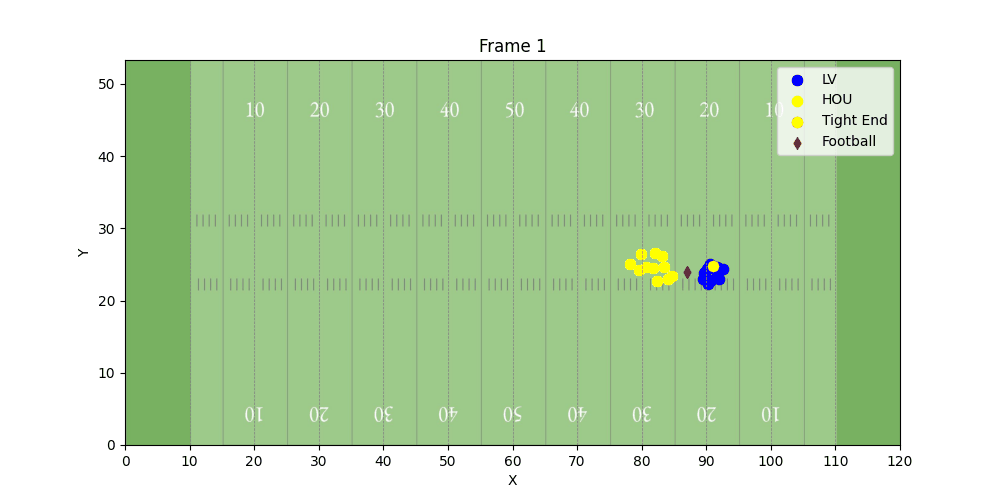

In [42]:
# Animation Visualizer
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import imageio
import numpy as np
import pandas as pd
from scipy.spatial import distance
from IPython.display import display, Image

# Input values
frame = 153
game_id = 2022102308
play_id = 569

# Filter data for the specific play and frame
play299 = tracking_df[
    (tracking_df['gameId'] == game_id) &
    (tracking_df['playId'] == play_id)
]

play299_ball = tracking_df[
    (tracking_df['gameId'] == game_id) &
    (tracking_df['playId'] == play_id) &
    (tracking_df['frameId'] == frame) &
    (tracking_df['club'] == 'football')
]

# Merge play data with players information
play299 = play299.merge(players, on='displayName', how='left')

# Separate offense and defense
offense = play299[play299['club'] == play299[play299['position'] == 'QB']['club'].iloc[0]]
defense = play299[play299['club'] == play299[play299['position'] == 'CB']['club'].iloc[0]]

# Filter offense and defense for the specific frame
play299_offense = offense[offense['frameId'] == frame]
play299_defense = defense[defense['frameId'] == frame]

# Load the background image
background_img = mpimg.imread('/Users/danielsoriano/Downloads/nfl-big-data-bowl-2025/football_field.jpg')

# Define target positions and initialize frames for the GIF
target_positions = {'TE': 2}
gif_frames = []

# Loop through each frame to create the animation
for frame_id in sorted(play299['frameId'].unique()):
    frame_data = play299[play299['frameId'] == frame_id]
    
    # Identify clubs (teams) excluding the football
    clubs = frame_data['club'].unique()
    clubs = [club for club in clubs if club != 'football'][:2]
    
    # Separate offensive and defensive players in the frame
    off_players_frame = frame_data[frame_data['club'] == clubs[0]]
    def_players = frame_data[frame_data['club'] == clubs[1]]
    
    # Filter target players (e.g., Tight Ends)
    off_targets = off_players_frame[off_players_frame['position'].isin(target_positions.keys())]
    off_target_data = []
    for position, count in target_positions.items():
        position_players = off_targets[off_targets['position'] == position]
        off_target_data.append(position_players.head(count))
    off_target_data = pd.concat(off_target_data)

    tightend_data = frame_data[frame_data['position'] == 'TE']

    # Create a plot for the frame
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.set_xlim(0, 120)
    ax.set_ylim(0, 53.3)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title(f'Frame {frame_id}')
    ax.imshow(background_img, extent=[0, 120, 0, 53.3], aspect='auto', alpha=0.9)
    ax.set_xticks(range(0, 121, 10))  
    ax.grid(color='gray', linestyle='--', linewidth=0.5, axis='x')  
    
    # Plot players and ball
    ax.scatter(def_players['x'], def_players['y'], color='blue', s=55, label=clubs[1])
    ax.scatter(off_players_frame['x'], off_players_frame['y'], color='yellow', s=55, label=clubs[0])
    ax.scatter(tightend_data['x'], tightend_data['y'], color='orange', s=55, label='Tight End')
    ax.scatter(frame_data[frame_data['club'] == 'football']['x'], 
               frame_data[frame_data['club'] == 'football']['y'], 
               color='brown', s=35, label='Football', marker='d')

    # Draw lines between offensive players and their closest defense/teammates
    for _, off_player in off_target_data.iterrows():
        distances = def_players.apply(
            lambda def_player: distance.euclidean(
                (off_player['x'], off_player['y']),
                (def_player['x'], def_player['y'])
            ),
            axis=1
        )
        closest_def_index = distances.idxmin()
        closest_def_player = def_players.loc[closest_def_index]

        teammate_distances = off_players_frame[off_players_frame.index != off_player.name].apply(
            lambda teammate: distance.euclidean(
                (off_player['x'], off_player['y']),
                (teammate['x'], teammate['y'])
            ),
            axis=1
        )
        closest_teammate_index = teammate_distances.idxmin()
        closest_teammate = off_players_frame.loc[closest_teammate_index]

        ax.plot(
            [off_player['x'], closest_def_player['x']], 
            [off_player['y'], closest_def_player['y']], 
            color='red', linewidth=2
        )
        ax.plot(
            [off_player['x'], closest_teammate['x']], 
            [off_player['y'], closest_teammate['y']], 
            color='purple', linewidth=2
        )

    ax.legend(loc='upper right')

    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    gif_frames.append(image)
    plt.close(fig)

gif_path = 'players_positions_with_background.gif'
imageio.mimsave(gif_path, gif_frames, duration=0.1)

display(Image(filename=gif_path))


In [43]:
# Animation Visualizer with predictions from the test DataFrame
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import imageio
import numpy as np
import pandas as pd
from scipy.spatial import distance
from IPython.display import display, Image
from matplotlib.colors import LinearSegmentedColormap

# Input values
frame = 153
game_id = 2022091105
play_id = 619

# Filter data for the specific play and frame
play299 = tracking_df[
    (tracking_df['gameId'] == game_id) &
    (tracking_df['playId'] == play_id)
]

play299_ball = tracking_df[
    (tracking_df['gameId'] == game_id) &
    (tracking_df['playId'] == play_id) &
    (tracking_df['frameId'] == frame) &
    (tracking_df['club'] == 'football')
]

# Merge play data with players information
play299 = play299.merge(players, on='displayName', how='left')

# Filter `test` DataFrame for the same play
test_predictions = test[
    (test['gameId'] == game_id) &
    (test['playId'] == play_id)
]

# # Merge predictions into the play data
# play299 = play299.merge(
#     test_predictions[['frameId', 'nflId', 'te_prediction']],
#     on=['frameId', 'nflId'],
#     how='left'
# )

# Separate offense and defense
offense = play299[play299['club'] == play299[play299['position'] == 'QB']['club'].iloc[0]]
defense = play299[play299['club'] == play299[play299['position'] == 'CB']['club'].iloc[0]]

# Filter offense and defense for the specific frame
play299_offense = offense[offense['frameId'] == frame]
play299_defense = defense[defense['frameId'] == frame]

# Load the background image
background_img = mpimg.imread('/Users/danielsoriano/Downloads/nfl-big-data-bowl-2025/football_field.jpg')

# Define target positions and initialize frames for the GIF
target_positions = {'TE': 2}
gif_frames = []

# Define a colormap for the `te_prediction` values
cmap = LinearSegmentedColormap.from_list("te_colors", ["white", "red"])

# Loop through each frame to create the animation
for frame_id in sorted(play299['frameId'].unique()):
    frame_data = play299[play299['frameId'] == frame_id]
    
    # Identify clubs (teams) excluding the football
    clubs = frame_data['club'].unique()
    clubs = [club for club in clubs if club != 'football'][:2]
    
    # Separate offensive and defensive players in the frame
    off_players_frame = frame_data[frame_data['club'] == clubs[0]]
    def_players = frame_data[frame_data['club'] == clubs[1]]
    
    # Filter target players (e.g., Tight Ends)
    off_targets = off_players_frame[off_players_frame['position'].isin(target_positions.keys())]
    off_target_data = []
    for position, count in target_positions.items():
        position_players = off_targets[off_targets['position'] == position]
        off_target_data.append(position_players.head(count))
    off_target_data = pd.concat(off_target_data)

    tightend_data = frame_data[frame_data['position'] == 'TE']

    # Get the `te_prediction` value for each TE in the frame
    te_pred = test[(test['playId'] == play_id) & (test['gameId'] == game_id) & (test['position'] == 'TE')]

    te_predictions = te_pred['prediction']

    # Map `te_prediction` values to colors
    te_colors = te_predictions.apply(lambda x: cmap(x) if pd.notnull(x) else 'gray')

    # Create a plot for the frame
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.set_xlim(0, 120)
    ax.set_ylim(0, 53.3)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title(f'Frame {frame_id}')
    ax.imshow(background_img, extent=[0, 120, 0, 53.3], aspect='auto', alpha=0.9)
    ax.set_xticks(range(0, 121, 10))  
    ax.grid(color='gray', linestyle='--', linewidth=0.5, axis='x')  
    
    # Plot players and ball
    ax.scatter(def_players['x'], def_players['y'], color='blue', s=55, label=clubs[1])
    ax.scatter(off_players_frame['x'], off_players_frame['y'], color='yellow', s=55, label=clubs[0])
    ax.scatter(tightend_data['x'], tightend_data['y'], c=te_colors, s=55, label='Tight End', edgecolor='black')
    ax.scatter(frame_data[frame_data['club'] == 'football']['x'], 
               frame_data[frame_data['club'] == 'football']['y'], 
               color='brown', s=35, label='Football', marker='d')

    # Draw lines between offensive players and their closest defense/teammates
    for _, off_player in off_target_data.iterrows():
        distances = def_players.apply(
            lambda def_player: distance.euclidean(
                (off_player['x'], off_player['y']),
                (def_player['x'], def_player['y'])
            ),
            axis=1
        )
        closest_def_index = distances.idxmin()
        closest_def_player = def_players.loc[closest_def_index]

        teammate_distances = off_players_frame[off_players_frame.index != off_player.name].apply(
            lambda teammate: distance.euclidean(
                (off_player['x'], off_player['y']),
                (teammate['x'], teammate['y'])
            ),
            axis=1
        )
        closest_teammate_index = teammate_distances.idxmin()
        closest_teammate = off_players_frame.loc[closest_teammate_index]

        ax.plot(
            [off_player['x'], closest_def_player['x']], 
            [off_player['y'], closest_def_player['y']], 
            color='red', linewidth=2
        )
        ax.plot(
            [off_player['x'], closest_teammate['x']], 
            [off_player['y'], closest_teammate['y']], 
            color='purple', linewidth=2
        )

    ax.legend(loc='upper right')

    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    gif_frames.append(image)
    plt.close(fig)

gif_path = 'players_positions_with_dynamic_te_color.gif'
imageio.mimsave(gif_path, gif_frames, duration=0.1)

display(Image(filename=gif_path))


KeyError: 'prediction'

In [28]:
# Animation Visualizer
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import imageio
import numpy as np
from scipy.spatial import distance
from IPython.display import display, Image

frame = 153
game_id = 2022091105 #2022092507
play_id = 619 #2752

play299 = tracking_df[(tracking_df['gameId'] == game_id) 
                          & (tracking_df['playId'] == play_id)]
                        #   & (tracking_df['frameType'] == 'SNAP')]

play299_ball = tracking_df[(tracking_df['gameId'] == game_id) 
                          & (tracking_df['playId'] == play_id) 
                          & (tracking_df['frameId'] == frame) 
                          & (tracking_df['club'] == 'football')]

# play299 = play299.merge(players, on='displayName', how='left')

offense = play299[play299['club'] == play299[play299['position'] == 'QB']['club'].iloc[0]]

defense = play299[play299['club'] == play299[play299['position'] == 'CB']['club'].iloc[0]]

# play299_offense = offense[offense['frameId'] == frame]

# play299_defense = defense[defense['frameId'] == frame]

background_img = mpimg.imread('/Users/danielsoriano/Downloads/nfl-big-data-bowl-2025/football_field.jpg')

target_positions = {'TE': 2}

gif_frames = []

for frame_id in sorted(play299['frameId'].unique()):
    frame_data = play299[play299['frameId'] == frame_id]
    
    clubs = frame_data['club'].unique()
    clubs = [club for club in clubs if club != 'football'][:2]
    
    off_players_frame = frame_data[frame_data['club'] == clubs[0]]
    def_players = frame_data[frame_data['club'] == clubs[1]]

    # def_players = def_players_frame.merge(players, on='displayName')
    off_targets = off_players_frame[off_players_frame['position'].isin(target_positions.keys())]

    off_target_data = []
    for position, count in target_positions.items():
        position_players = off_targets[off_targets['position'] == position]
        off_target_data.append(position_players.head(count))
    off_target_data = pd.concat(off_target_data)

    tightend_data = frame_data[frame_data['position'] == 'TE']

    fig, ax = plt.subplots(figsize=(10, 5))
    ax.set_xlim(0, 120)
    ax.set_ylim(0, 53.3)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title(f'Frame {frame_id}')
    ax.imshow(background_img, extent=[0, 120, 0, 53.3], aspect='auto', alpha=0.9)

    ax.set_xticks(range(0, 121, 10))  
    ax.grid(color='gray', linestyle='--', linewidth=0.5, axis = 'x')  
    
    ax.scatter(frame_data[frame_data['club'] == clubs[1]]['x'], 
               frame_data[frame_data['club'] == clubs[1]]['y'], 
               color='blue', s=55, label=clubs[1])
    ax.scatter(frame_data[frame_data['club'] == clubs[0]]['x'], 
               frame_data[frame_data['club'] == clubs[0]]['y'], 
               color='yellow', s=55, label=clubs[0])
    ax.scatter(tightend_data['x'], tightend_data['y'], 
               color='orange', s=55, label='Tight End')
    ax.scatter(frame_data[frame_data['club'] == 'football']['x'], 
               frame_data[frame_data['club'] == 'football']['y'], 
               color='brown', s=35, label='Football', marker='d')

    # for _, off_player in off_target_data.iterrows():
    #     distances = def_players.apply(
    #         lambda def_player: distance.euclidean(
    #         (off_player['x'], off_player['y']),
    #         (def_player['x'], def_player['y'])
    #     ),
    #     axis=1
    # )
    # closest_def_index = distances.idxmin()
    # closest_def_player = def_players.loc[closest_def_index]

    # teammate_distances = off_players_frame[off_players_frame.index != off_player.name].apply(
    #     lambda teammate: distance.euclidean(
    #         (off_player['x'], off_player['y']),
    #         (teammate['x'], teammate['y'])
    #     ),
    #     axis=1
    # )
    # closest_teammate_index = teammate_distances.idxmin()
    # closest_teammate = off_players_frame.loc[closest_teammate_index]

    # ax.plot(
    #     [off_player['x'], closest_def_player['x']], 
    #     [off_player['y'], closest_def_player['y']], 
    #     color='red', linewidth=2
    # )

    # ax.plot(
    #     [off_player['x'], closest_teammate['x']], 
    #     [off_player['y'], closest_teammate['y']], 
    #     color='purple', linewidth=2
    # )

    ax.legend(loc='upper right')

    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.buffer_rgba(), dtype=np.uint8)
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (4,))
    gif_frames.append(image)
    plt.close(fig)

gif_path = 'players_positions_with_background.gif'
imageio.mimsave(gif_path, gif_frames, duration=0.1)

display(Image(filename=gif_path))

KeyError: 'position'

In [42]:
test[(test['playId'] == 1321) & (test['gameId'] == 2022091811) & (test['position'] == 'TE')]

Empty DataFrame
Columns: [gameId, playId, nflId_x, displayName, frameId, frameType, time, club, playDirection, x, y, s, a, dis, o, dir, event, nflId_y, position, wasRunningRoute, didBlock, distanceToFootball, closest_teammate_distance, closest_teammate_position, closest_defender_distance, closest_defender_position, orientation, position_encoded, orientation_encoded, closest_defender_position_encoded]
Index: []

[0 rows x 30 columns]

In [ ]:
players['position'].unique()

In [ ]:
# feature engineer, direction they are facing (sideline or defense)
# 2nd closest defender/teammate, distance to ball
# 
# kind of motion

In [ ]:
# thursday night football predictions 